<a href="https://colab.research.google.com/github/Larai15/kubernetes/blob/master/Copy_of_INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

data_list = []
result = []
def get_continuous_chunks(text, chunk_func=ne_chunk):
    chunked = chunk_func(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue
    
    result.append(continuous_chunk)
    return continuous_chunk
with open("imdb.csv", "r") as fp:
    data_list = fp.readlines()

df = pd.DataFrame({'text':data_list})

df['text'].apply(lambda sent: get_continuous_chunks((sent)))
words_list = [item for sublist in result for item in sublist]
print(words_list)
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer("english")



# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in words_list:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame.head()


from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(words_list) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

features = tfidf_vectorizer.get_feature_names()



from sklearn.cluster import KMeans

num_clusters = 2

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

print(clusters)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['USER', 'JF500', 'TIFF', 'MASTERPIECE', 'Phoenix', 'MihaVrhunc', 'Chandler_Bing_', 'Heath Ledger', 'Hype', 'MASTERPIECE', 'VallejoDiego', 'JUST', 'Joaquin', 'Joker', 'Dark', 'REAL', 'CGI', 'Joker', 'TVpotatoCat', 'Aaron_Kyle', 'Masterpiece']
CPU times: user 38.4 ms, sys: 1.98 ms, total: 40.4 ms
Wall time: 58.4 ms
(21,

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 24.3 ms, sys: 358 µs, total: 24.6 ms
Wall time: 23.2 ms
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]
                   precision    recall  f1-score   support

  burkholdermicah       0.00      0.00      0.00       1.0
 davestroud-76036       0.00      0.00      0.00       1.0
           g_bake       0.00      0.00      0.00       1.0
lesterarnoldpinto       0.00      0.00      0.00       1.0
         link9933       0.00      0.00      0.00       0.0
      logical_guy       0.00      0.00      0.00       1.0

         accuracy                           0.00       5.0
        macro avg       0.00      0.00      0.00       5.0
     weighted avg       0.00      0.00      0.00       5.0

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


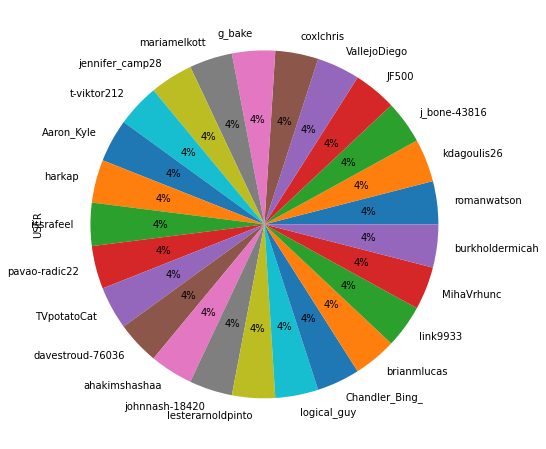

In [0]:
import numpy as np
import re
import nltk
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

imdb_reviews = pd.read_csv(r"imdb.csv", encoding = "ISO-8859-1")
imdb_reviews.head()

plt.rcParams["figure.figsize"] = [10, 8]
imdb_reviews['USER'].value_counts().plot(kind='pie', autopct='%1.0f%%')

reviews = imdb_reviews["USER"].tolist()
labels = imdb_reviews["USER"].values

processed_reviews = []

for text in range(0, len(reviews)):
        text = re.sub(r'\W', ' ', str(reviews[text]))
    
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
        text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    
        text = re.sub(r'\s+', ' ', text, flags=re.I)
    
        text = re.sub(r'^b\s+', '', text)
    
        processed_reviews.append(text)
        
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_reviews, labels, test_size=0.2, random_state=0)
    
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000, min_df=1, max_df=10, stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
    
    
from sklearn.ensemble import RandomForestClassifier
    
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))





# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


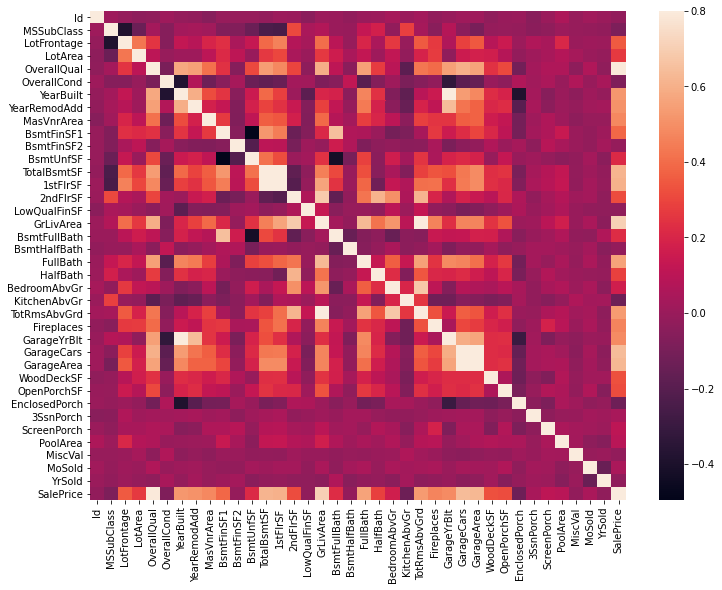

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from scipy.stats import norm
%matplotlib inline

# Importing the traning set and test set
dataset = pd.read_csv(r'train.csv')

y = dataset.iloc[:, -1].values
dataset_res = pd.read_csv(r'test.csv')
y_res = dataset_res.iloc[:, -1].values

# dataset.describe()

# dataset_res.describe()

zero_check_train = dataset.isnull().sum()
zero_check_train = zero_check_train[zero_check_train!=0]
zero_check_train = zero_check_train.sort_values(ascending=False)

corrmat = dataset.corr()
f, ax1 = plt.subplots(figsize=(12,9))

ax1=sns.heatmap(corrmat,vmax = 0.8);


#Show the top 10 feature which have strongest correlation with SalePrice
corr_sale = dataset.corr().SalePrice
corr_field = corr_sale.sort_values(ascending = False).head(11)
corr_field

#I will choose the these columns to predict the price using linear regression
#As checked the definition of those columns, there are some columns which are highly corrleated each other.Such as GarageCars and GarageArea, YearBuilt and YearRemodAdd We can consider dropping the columns further

corr_field = corr_field.drop(['YearRemodAdd','GarageCars','1stFlrSF']).index




